<a href="https://colab.research.google.com/github/fantofan/Fanto-s-Final-Project/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question: Why Affordable Housing is not "Affordable" at all?

# Introduction

---


Despite numerous policies and initiatives aimed at increasing affordable housing, a significant portion of the population do not have access to homeownership. Programs like 421a and 485x are designed to stimulate affordable housing development in New York City, yet affordability issue remains.  This project explores the disconnect between the concept of affordable housing and its practical outcomes focusing on public perceptions as shared on Reddit. Specifically, ***why does affordable housing fail to be truly “affordable” for many intended beneficiaries?*** Understanding the reasons behind will provide actionable insights for housing policy improvement.

Before examining public opinion, the broader issue of affordable housing’s shortcomings has been widely studied in both media and academic contexts. In media discourse, Zaveri (2024) highlights how a scarcity of apartments, coupled with high construction costs, maintenance expenses, and profit pressures, exacerbates affordability challenges. He concludes that while public funding can make affordable housing viable, limited resources hinder its widespread availability (New York Times, 2024).  In academia, scholars have highlighted key casual metrics behind affordable housing crisis- measurement, regulatory barriers, and community acceptance (NIMBYism). One prominent issue lies in defining affordability. Traditional metrics, such as the 30% income threshold, have faced criticism for oversimplifying the problem, as they fail to account for residual income and other essential expenditures, such as transportation costs. Brooks (2023) emphasizes the need for context-sensitive metrics to better capture the nuances of affordability, particularly for low-income and ethnoracially diverse households. Regulatory barriers, especially restrictive zoning laws, are another critical factor contributing to the housing crisis. Studies have shown that these regulations limit the housing supply and exacerbate affordability issues, particularly in urban areas. Büchler and Lutz (2024) identify upzoning, or increasing allowable housing density, as a potential solution, which can significantly expand housing stock and stabilize rents over time. However, the impacts are often delayed, and implementation faces resistance from local stakeholders. Community acceptance of affordable housing also presents significant challenges. Diamond and McQuade (2016) explore the effects of subsidized housing developments like those funded by the Low-Income Housing Tax Credit (LIHTC). Their findings indicate that while such projects can revitalize low-income neighborhoods, they often face resistance in higher-income areas, where residents fear property devaluation and demographic shifts.

These insights underline the complexity of the affordable housing issue and the necessity of multi-faceted, targeted approaches. However, the perspectives of the public, particularly as shared on platforms like Reddit, remain underexplored. This gap is critical, as understanding public opinion can reveal overlooked challenges and opportunities for aligning policy with community needs.

# Hypothesis

---


Based on literature review, this research hypothesizes that public perceptions on unaffordability of affordable housing is driven by multiple systemic challenges including:
*   Vague definitions of affordable housing create a mismatch between intended policy outcomes and actual affordability for residents.
*   High construction costs compounded by project delay inflates the final prices.
*   A persistent financing gap between public subsidies and private investment limits developers from delivering affordable housing at scale.
*   Supply shortages driven by high demand creates a competitive market that reduces accessibility particularly for lower-income groups.


# Methodology
---
Step1: Data Collection

The analysis began with data collection using PRAW, a Python library for accessing Reddit. This data source captures diverse perspectives, allowing for nuanced sentiment analysis and thematic exploration.

Step 2: Data Cleaning

The collected comments were preprocessed through lemmatization to reduce words to their base forms and the removal of stopwords to eliminate common but uninformative words. During iterative cleaning, a custom stopword list was developed to further refine the dataset.

Step 3: Text Analysis and Visualization

TF-IDF, Topic Modelling and Sentiment Analysis are used in this project. First, the cleaned text underwent a term frequency analysis and TF-IDF analysis to identify the most prominent words and phrases. These methods helped highlight recurring themes and distinguish unique terms within the dataset. Second, Topic modelling using Latent Dirichlet Allocation (LDA) was conducted to extract thematic structures from the comments. The comments were also categorized into sentiment groups using sentiment analysis, which then underwent a second round of topic modeling to achieve a more nuanced understanding of the data. For Reddit, Sentiment analysis using VADER is particularly effective because it is tuned for social media text and considers aspects like negation and punctuation. Finally, the analysis focused on specific keywords, 421a and 485x, which are central to the discussion on affordable housing policy in NYC. By isolating and analyzing comments containing these terms, a clearer understanding of public opinion on these policies was achieved, shedding light on the community’s perspective regarding affordable housing issues in the city..Various Visualization methods such as word clouds, bar charts are applied for a clearer results.

Note：For the codes used in this paper, outside the tutorial, I self-designed the code with the help of ChatGPT.

# Results


---



## 1. Data Collection

I specifically focused on Subreddits within r/NYC, as they offer valuable, unfiltered insights from New York City residents. The Reddit post titled "*AMI in NYC: Why 'Affordable Housing' Isn't So Affordable*" was selected for analysis due to its strong relevance to the research topic. This post contains 160 comments, providing a reasonable amount of dataset for exploration. The comments were sorted based on their score (calculated as the difference between upvotes and downvotes), reflecting how well they were received by the Reddit community. Additionally, the "Date" field was reformatted into a more readable format to enhance data usability.

In [1]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.8 MB/s eta 0:00:00


In [2]:
pip install --upgrade praw

In [3]:
import praw
import re
from pprint import pprint
import pandas as pd
from datetime import datetime
from praw.models import Comment
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Reddit API credentials
reddit = praw.Reddit(
    client_id="Gysdx8UtkcAJbp5Eiihnzg",
    client_secret="6gACAxr83gfNPz830tSUsBBaqVCFJg",
    user_agent="Fanto Fan Script"
)

In [5]:
# Fetch the submission using the URL
url = "https://www.reddit.com/r/nyc/comments/1crrpwd/ami_in_nyc_why_affordable_housing_isnt_so/"
submission = reddit.submission(url=url)

In [6]:
submission.comments.replace_more(limit=None)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



[]

In [7]:
# Function to get parent comment text, return None if the parent is the post itself
def get_parent_text(comment):
    if isinstance(comment.parent(), Comment):
        return comment.parent().body
    return None

In [8]:
# Extract comments
comments_data = []
for comment in submission.comments.list():
    comments_data.append({
        "parent_id": comment.id,
        "author": str(comment.author),
        "parent_text": comment.body,
        "score": comment.score,
        "date": comment.created_utc,
    })

In [9]:
# Convert comments into DataFrame
comments_df = pd.DataFrame(comments_data)

In [10]:
comments_df.to_csv("nyc_reddit_comments.csv", index=False)

In [11]:
# Show full text
pd.set_option('display.max_colwidth', None)

In [12]:
# Show preview
print("DataFrame preview:")
comments_df.head()

DataFrame preview:


,parent_id,author,parent_text,score,date
0,l40meoy,99hoglagoons,"Man, all these comments and not a single one even remotely relevant to the topic at hand. Are we on reddit or twitter or NYPost comment section. It doesn't matter anymore. Just shoot your load that is marginally related to the topic. \n\nBut basically:\n\n* NYC tried to create a private-public partnership with developers. 421a essentially. Massive property tax abatements in exchange for X percentage of affordable units.\n\n* Turns out most of the affordable units created are not affordable at all. \n\n* Affordability is calculated based on AMI (area median income), but HUD forces NYC to calculate the AMI based on greater NYC area, not just the city, or borough, or specific neighborhood. \n\n* Turns out poor people in Bronx and Queens and Brooklyn make a lot less money than people in New Rochelle, or whatever. \n\n* When an affordable unit is built, it is often listed as eligible for 70-110% AMI, which is completely unaffordable for anyone actually low income. \n\n* End result is that a lot of communities end up being stoutly against any new development, because they can see with their own eyes that none of the new stuff is actually for them. \n\n* The affordable housing program ended up accidentally creating a whole new type and generation of NIMBYS.\n\nI ad-libbed on the last two points. But this is where we are now.",217,1.715702e+09
1,l3zy7ba,TarumK,"Is there any realistic way housing could be affordable in NYC without a massive drop in demand? Like, if you make housing way below market rate people are just gonna stay in it forever, as happens with rent control and public housing, so it's still gonna be functionally unavailable for most people that would want.",65,1.715693e+09
2,l4014fm,Puzzleheaded_Will352,Just fucking build already Jesus Christ. How many times are we going to talk about there not being enough housing before we…build some damn housing.,46,1.715694e+09
3,l41bhej,mtempissmith,"Housing Connect, the lottery site, it is a complete joke if you are not making 100K and up a year or are not at least 62. There are some breaks for truly low income seniors but otherwise not much. \n\nI would be still sitting in a shelter if I'd been dependent upon just those lotteries. The irony is the site still puts me in for all these lotteries I can't qualify for. I can't delete my account but it does me NO good any of it. \n\nThe affordable housing unit that I've got I got through another agency and though it's pretty small I'm not letting go of it anytime soon. It's a miracle that I got tapped for this place. I'm sticking with it until I hit 62 or become a best selling author whichever comes first. \n\nI've had 3 years of peace and quiet and relative security after years of craziness and constant upheaval. I don't take having a roof over my head for granted at all. I'm just too grateful to have one especially since I am where I am, in Manhattan, and I'm not sharing my apartment. \n\nThere are people paying $2800 and up for something similar here. Maybe a bit better kitchen than mine but about the same space. I don't pay anything like that. So you won't hear me complaining much...\n\nBut I've tried those lotteries and it was just an exercise in futility on my income...",4,1.715710e+09
4,l3zxa7w,citytiger,Our leaders like that it's unaffordable for the average person. I wish they would say it publicity.,4,1.715693e+09


In [13]:
# Format the Date
from datetime import datetime

comments_df['date'] = comments_df['date'].apply(
    lambda x: datetime.fromtimestamp(x) if isinstance(x, (int, float)) else x
)

In [14]:
comments_df.to_csv('cleaned_comments_with_readable_date.csv', index=False)

In [15]:
# Handle missing values in the parent_id and parent_text columns
comments_df['parent_id'] = comments_df['parent_id'].fillna('no id')
comments_df['parent_text'] = comments_df['parent_text'].fillna('no parent comment')

In [16]:
comments_df.sort_values('score', ascending=False)

,parent_id,author,parent_text,score,date
0,l40meoy,99hoglagoons,"Man, all these comments and not a single one even remotely relevant to the topic at hand. Are we on reddit or twitter or NYPost comment section. It doesn't matter anymore. Just shoot your load that is marginally related to the topic. \n\nBut basically:\n\n* NYC tried to create a private-public partnership with developers. 421a essentially. Massive property tax abatements in exchange for X percentage of affordable units.\n\n* Turns out most of the affordable units created are not affordable at all. \n\n* Affordability is calculated based on AMI (area median income), but HUD forces NYC to calculate the AMI based on greater NYC area, not just the city, or borough, or specific neighborhood. \n\n* Turns out poor people in Bronx and Queens and Brooklyn make a lot less money than people in New Rochelle, or whatever. \n\n* When an affordable unit is built, it is often listed as eligible for 70-110% AMI, which is completely unaffordable for anyone actually low income. \n\n* End result is that a lot of communities end up being stoutly against any new development, because they can see with their own eyes that none of the new stuff is actually for them. \n\n* The affordable housing program ended up accidentally creating a whole new type and generation of NIMBYS.\n\nI ad-libbed on the last two points. But this is where we are now.",217,2024-05-14 15:46:33
7,l40s0jl,soflahokie,"Thanks for explaining this, I've always wondered with the ""low-income"" units cost like $2,500 a month and the income max is something like $110k. That's completely unaffordable",87,2024-05-14 16:18:01
15,l4032t6,hereswhatipicked,"I've always thought the solution was more and better transit options. If you could get anywhere in the NYC from anywhere in NYC in 30min, that would open up a lot of areas where there is housing stock to people who are living in NYC more for the employment options than the urban-chic lifestyle (and there are plenty of people who fit that bill).\n\nObviously, that is pie-in-the-sky idea and probably as equally impossible as building enough units to outpace demand. But we can dream!",71,2024-05-14 13:53:34
1,l3zy7ba,TarumK,"Is there any realistic way housing could be affordable in NYC without a massive drop in demand? Like, if you make housing way below market rate people are just gonna stay in it forever, as happens with rent control and public housing, so it's still gonna be functionally unavailable for most people that would want.",65,2024-05-14 13:22:31
2,l4014fm,Puzzleheaded_Will352,Just fucking build already Jesus Christ. How many times are we going to talk about there not being enough housing before we…build some damn housing.,46,2024-05-14 13:41:21
...,...,...,...,...,...
87,l409sah,Rottimer,Those rules didn’t come out of nowhere. I agree there is a lot of NIMBY protectionism that makes building in NYC long and expensive. But there are also rules so that people aren’t fucked over by developers that will never have to live in or around the structures they build.,-7,2024-05-14 14:34:02
57,l40oisx,TarumK,I don't think this is reconcilable with what NYC actually is. It's not a place where long standing populations stay in the same neighborhood forever. It's a place where immigrants come in from the outside and people move from the rest of America for work. There has to be a corresponding outflow of people-you can't just have immigrants constantly coming in to a place where the population doesn't change too much year after year without people moving out. None of that would be possible without a fluid housing market.,-7,2024-05-14 15:58:18
117,l40bp7s,Far_Indication_1665,"Your cold hearted bastard nature on full display, again.",-11,2024-05-14 14:45:16
36,l40y9f4,Internal-Spray-7977,"110k isn't ""unaffordable"" by NYC standards. New grads in some industries make more than that. It's just a result of there being demand for more housing in nearby locations because people who ma

In [17]:
comments_df.sort_values('score', ascending=True)

,parent_id,author,parent_text,score,date
73,l40o41z,mad_king_soup,"So you basically want the opportunities afforded by a big city without the cost and without having to participate in the “urban lifestyle”, right?\n\nDamn, some people just want everything their way",-13,2024-05-14 15:56:01
117,l40bp7s,Far_Indication_1665,"Your cold hearted bastard nature on full display, again.",-11,2024-05-14 14:45:16
36,l40y9f4,Internal-Spray-7977,"110k isn't ""unaffordable"" by NYC standards. New grads in some industries make more than that. It's just a result of there being demand for more housing in nearby locations because people who make 110k are willing to commute to save 1500/mo. It's a supply shortage.",-11,2024-05-14 16:52:40
87,l409sah,Rottimer,Those rules didn’t come out of nowhere. I agree there is a lot of NIMBY protectionism that makes building in NYC long and expensive. But there are also rules so that people aren’t fucked over by developers that will never have to live in or around the structures they build.,-7,2024-05-14 14:34:02
56,l40lg6j,movingtobay2019,You live where you can afford. Why are you more deserving than someone who can pay more? Because you got there first?,-7,2024-05-14 15:41:11
...,...,...,...,...,...
2,l4014fm,Puzzleheaded_Will352,Just fucking build already Jesus Christ. How many times are we going to talk about there not being enough housing before we…build some damn housing.,46,2024-05-14 13:41:21
1,l3zy7ba,TarumK,"Is there any realistic way housing could be affordable in NYC without a massive drop in demand? Like, if you make housing way below market rate people are just gonna stay in it forever, as happens with rent control and public housing, so it's still gonna be functionally unavailable for most people that would want.",65,2024-05-14 13:22:31
15,l4032t6,hereswhatipicked,"I've always thought the solution was more and better transit options. If you could get anywhere in the NYC from anywhere in NYC in 30min, that would open up a lot of areas where there is housing stock to people who are living in NYC more for the employment options than the urban-chic lifestyle (and there are plenty of people who fit that bill).\n\nObviously, that is pie-in-the-sky idea and probably as equally impossible as building enough units to outpace demand. But we can dream!",71,2024-05-14 13:53:34
7,l40s0jl,soflahokie,"Thanks for explaining this, I've always wondered with the ""low-income"" units cost like $2,500 a month and the income max is something like $110k. That's completely unaffordable",87,2024-05-14 16:18:01


## 2. Data Cleansing

After an initial round of word frequency analysis, I conducted an important methodological adjustment which I identified additional domain-specific terms, such as "housing," "NYC," "people," "building," and "NewYork," which were removed during the stopword elimination process. While these words carry inherent meaning, they are less informative due to their high recurrence due to the nature of the post. Excluding them will highlight more meaningful patterns in the dataset.

In [18]:
! pip install nltk

In [19]:
import nltk
import string

In [20]:
from nltk import pos_tag
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV

In [21]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {"housing","affordable","affordability","unit","nyc", "building","city", "people", "newyork", "want",
                    "would", "u", "could", "even", "like", "year", "think", "make", "got","get","http"}
stop_words.update(custom_stopwords)

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [24]:
# Function to get POS tag for WordNet lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts."""
    tag = nltk.pos_tag([word])[0][1][0].upper()  # Get the POS tag of the word
    tag_dict = {"J": wordnet.ADJ,  # Adjective
                "N": wordnet.NOUN,  # Noun
                "V": wordnet.VERB,  # Verb
                "R": wordnet.ADV}  # Adverb
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun

In [25]:
# Function to clean, lemmatize, and remove stopwords
def clean_and_lemmatize(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return ''

    # Remove unwanted symbols using regex
    text = re.sub(r'[\n\r\t]+|[\*>]+|[^\w\s]', ' ', text)  # Remove unwanted symbols
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spaces

    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())

    # Remove non-alphabetic tokens and stopwords, then lemmatize
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens
        if word.isalpha() and word not in stop_words
    ]

    return ' '.join(lemmatized_tokens)

In [26]:
# Apply the function to the 'parent_text' column
comments_df['lemmatized_text'] = comments_df['parent_text'].apply(clean_and_lemmatize)

In [27]:
# Check results by displaying Row 0
row_index = 0
print("Original Text:", comments_df.loc[row_index, 'parent_text'])
print("Lemmatized Text:", comments_df.loc[row_index, 'lemmatized_text'])


Original Text: Man, all these comments and not a single one even remotely relevant to the topic at hand. Are we on reddit or twitter or NYPost comment section. It doesn't matter anymore. Just shoot your load that is marginally related to the topic. 

But basically:

* NYC tried to create a private-public partnership with developers. 421a essentially. Massive property tax abatements in exchange for X percentage of affordable units.

* Turns out most of the affordable units created are not affordable at all. 

* Affordability is calculated based on AMI (area median income), but HUD forces NYC to calculate the AMI based on greater NYC area, not just the city, or borough, or specific neighborhood. 

* Turns out poor people in Bronx and Queens and Brooklyn make a lot less money than people in New Rochelle, or whatever. 

* When an affordable unit is built, it is often listed as eligible for 70-110% AMI, which is completely unaffordable for anyone actually low income. 

* End result is that 

## 3. TEXT ANALYSIS

### 3.1 Term Frequency Analaysis

Word frequency analysis provides a starting point for understanding public discussion.  In term frequency analysis, “tax” is weighted the highest, followed by “market”. In TF-IDF analysis, with the lowest 20 TF-IDF scores, topics such as "nimby" (Not In My Backyard), "abatement” and “condo” dominated the lower end of the TF-IDF score, suggesting core discussions in the discourse. High TF-IDF terms reveal more specific and contextually significant ideas that occur less frequently across the corpus but carry high importance in individual discussions. Terms such as "demand," "supply," and "market" suggest a focus on policy debates regarding supply-side vs. demand-side solutions. The appearance of emotionally charged terms like "fuck" signals the intensity and frustration surrounding this issue, suggesting that public opinion is not only analytical but also deeply emotional. However, the outcomes show over-presentation of generic terms such as "ops","lol", "new", and "year", which are inherent in Reddit analysis and dilute the specificity of insights. Meanwhile, the outcome does not distinguish between positive and negative annotation of terms. Thus, I paired topic modelling to provide richer and more nuanced insights.

In [28]:
!pip install tomotopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.5 MB/s eta 0:00:00


In [29]:
import tomotopy as tp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
# Function to generate frequency list from lemmatized text
def word_frequency_analysis(dataframe, text_column):
    # Combine all rows in the specified column into a single string
    all_text = ' '.join(dataframe[text_column].dropna())

    # Tokenize and count word frequencies
    words = all_text.split()  # Split by whitespace
    frequency = {}
    for word in words:
        frequency[word] = frequency.get(word, 0) + 1

    # Convert frequency dictionary into a DataFrame
    Freqdf = pd.DataFrame(frequency.items(), columns=['word', 'frequency'])
    Freqdf['weighted_percentage'] = round((Freqdf['frequency'] / Freqdf['frequency'].sum()) * 100, 2)

    # Sort by frequency in descending order
    return Freqdf.sort_values('frequency', ascending=False).reset_index(drop=True)

# Apply the function to the lemmatized_text column
word_freq_df = word_frequency_analysis(comments_df, 'lemmatized_text')

# Display the top 20 most frequent words
print(word_freq_df.head(20))

            word  frequency  weighted_percentage
0            tax         49                 1.22
1         market         37                 0.92
2            new         34                 0.85
3       property         33                 0.82
4            pay         32                 0.80
5           live         32                 0.80
6          build         31                 0.77
7           rent         30                 0.75
8           unit         29                 0.72
9           move         28                 0.70
10          high         26                 0.65
11           one         25                 0.62
12        rental         24                 0.60
13          year         24                 0.60
14         place         24                 0.60
15  neighborhood         22                 0.55
16        income         22                 0.55
17          need         22                 0.55
18           low         22                 0.55
19           say    

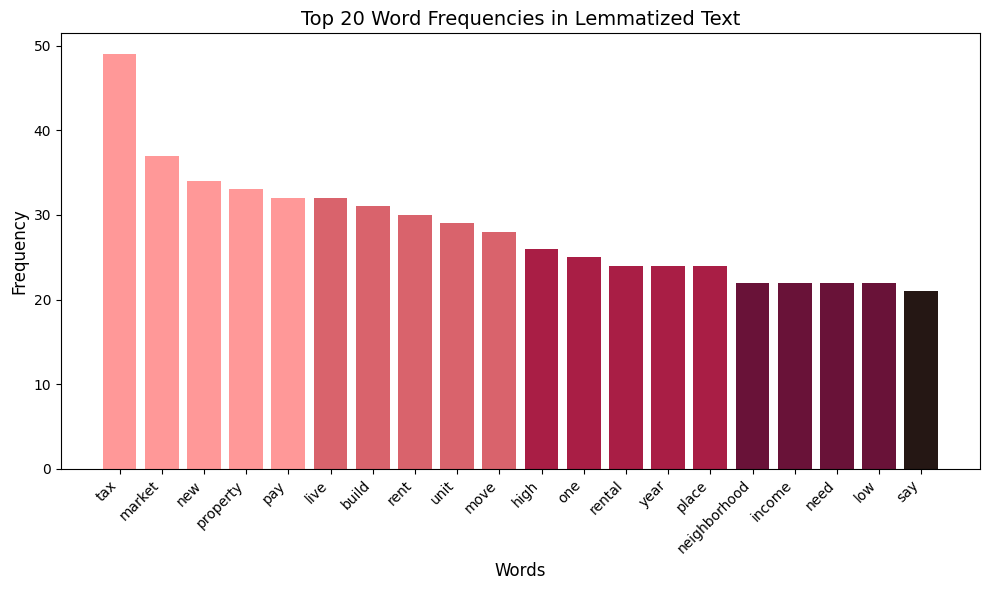

In [31]:
# Select the top 20 most frequent words and plot bar chart
top_words = word_freq_df.head(20)

colors = [
    '#FF9898FF', '#D9636CFF', '#A91E45FF', '#691238FF', '#251714FF'
]

# Display the bar chart
num_bars = len(top_words)
gradient_colors = [
    colors[int(i * (len(colors) - 1) / (num_bars - 1))] for i in range(num_bars)
]

plt.figure(figsize=(10, 6))
plt.bar(top_words['word'], top_words['frequency'], color=gradient_colors)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Word Frequencies in Lemmatized Text', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [32]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=2,
    stop_words='english',
    max_features=100
)

# Apply the TF-IDF vectorizer to the lemmatized_text column
tfidf_matrix = tfidf_vectorizer.fit_transform(comments_df['lemmatized_text'].dropna())

# Get feature names and their corresponding TF-IDF scores
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Create a DataFrame to store TF-IDF results
tfidf_df = pd.DataFrame(tfidf_scores, columns=tfidf_feature_names)

# Sum TF-IDF scores for each term across all documents
term_tfidf = tfidf_df.sum(axis=0).sort_values().reset_index()
term_tfidf.columns = ['term', 'tfidf_score']

# Display the top 20 terms with the highest TF-IDF scores
top_20_tfidf = term_tfidf.tail(20).sort_values(by='tfidf_score', ascending=False)
print("Top 20 Highest TF-IDF Scores:")
print(top_20_tfidf)

# Display the top 20 terms with the lowest TF-IDF scores
lowest_20_tfidf = term_tfidf.head(20)
print("\nTop 20 Lowest TF-IDF Scores:")
print(lowest_20_tfidf)

Top 20 Highest TF-IDF Scores:
            term  tfidf_score
99          live     8.397598
98         build     8.011868
97           new     7.143928
96          rent     7.030631
95          unit     6.881109
94          need     6.715278
93           pay     6.431303
92          time     6.373833
91        market     6.208537
90         place     6.127949
89          year     5.890887
88        demand     5.753755
87  neighborhood     5.218476
86        supply     5.174751
85           way     5.137805
84          fuck     4.958263
83           say     4.917667
82           tax     4.880008
81      property     4.748498
80          make     4.673360

Top 20 Lowest TF-IDF Scores:
            term  tfidf_score
0      abatement     0.903449
1            ops     0.986801
2           http     0.988794
3            add     1.217097
4         viable     1.234140
5          condo     1.244742
6          break     1.289542
7         number     1.554439
8            lol     1.681595
9        c

### 3.2 Topic Modelling and Sentiment Analysis

**3.2.a General Topic Modelling**

I applied a rule of thumb that aims about 1 topic per 5–15 comments and started running a general topic modelling using a Latent Dirichlet Allocation (LDA) model to generate top 10 topics (out of 160 discussions). The results were reasonably effective, uncovering specific themes related to supply-demand dynamics, income-based disparities, and the role of policies and developers.
Several topics stand out as particularly significant. To be specific, Topic 0 emphasizes issues surrounding "rental," "demand," "condo," and "supply." This suggests a focus on fluctuations in rental demand and challenges in maintaining adequate housing supply, particularly for larger units like condos. The terms "ops" and "change" might hint at operational adjustments or market responses to shifting demands. Topic 1, with terms like "income,"  "AMI" and "cost," and "build" underscores the relationship between income levels and housing affordability. It highlights systemic challenges, such as how income disparities affect access to housing and the difficulties faced by lower-income households. The inclusion of "build" suggests discussions on constructing affordable housing to address these gaps.

However, the results are limited by overlapping themes (eg. Topic 0, 8 and 9), lack of contextual clarity, and occasional noise (eg. terms such as “fuck”, else”). To further refine, I conducted sentiment analysis to grouping the data into sentiment categories, then re-running the topic modelling for a more nuanced thematic clustering.


In [33]:
# Use the lemmatized parent comments directly
parent_training_data = comments_df['lemmatized_text'].dropna().tolist()

# Initialize the LDA model
num_topics = 10
num_topic_words = 10
model = tp.LDAModel(k=num_topics)

# Add each document to the model
for text in parent_training_data:
    model.add_doc(text.split())

# Train the model
print("Topic Model Training...\n\n")
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Display Topic Model Results
print("\nTopic Model Results:\n\n")
topics = []
for topic_number in range(num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    print(f"✨ Topic {topic_number} ✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -8.076578194238394
Iteration: 10	Log-likelihood: -7.9781363851862
Iteration: 20	Log-likelihood: -7.938979802578984
Iteration: 30	Log-likelihood: -7.912677793307193
Iteration: 40	Log-likelihood: -7.878003349171514
Iteration: 50	Log-likelihood: -7.865326078282113
Iteration: 60	Log-likelihood: -7.846499925508977
Iteration: 70	Log-likelihood: -7.848931993235392
Iteration: 80	Log-likelihood: -7.821273153276736
Iteration: 90	Log-likelihood: -7.832830172559001

Topic Model Results:


✨ Topic 0 ✨

live neighborhood fuck stay entitle mean point one living somewhere

✨ Topic 1 ✨

ami income lot household increase however median create allow job

✨ Topic 2 ✨

tax rental property market big condo value co ops abatement

✨ Topic 3 ✨

build year demand developer agree take zone also supply sell

✨ Topic 4 ✨

go well right time know place displace idea real good

✨ Topic 5 ✨

market low change area built rate actually new thing brooklyn

✨ Topic 

**3.2.b Topic Modelling for Sentimented Groups**

The results show a surprising outcome, with over half neutral comments (51.2%) and a greater portion of positive comments (30%) over negative comments (18.8%). However, it's important to interpret these results critically. Diving deeper, positive comments often focus on proactive approaches such as development, income-based policies, and collaboration with developers, while negative comments emphasize systemic failures like market inequities, zoning challenges, and high costs.

The 48 positive comments focus on themes of potential solutions and areas of opportunity for improvement hence suggesting surface-level positivity. In contrast, the 31 negative comments reveal a much stronger biased tone and emotionally charged keywords further emphasize dissatisfactions. For instance, Topic 1 centerred around fordability, infrastructure issues and systemic problems. Terms like "pay," "afford," "double," and "transit" highlight the strain of rising costs, inadequate transportation infrastructure, and accessibility issues. The inclusion of "problem" and "shit" signals a sense of exasperation with persistent barriers to affordable living. Topic 2 captures dissatisfaction with the effects of new development on neighborhoods. Terms like "developer," "neighborhood," and "change" suggest negative perceptions of how housing projects impact community dynamics. Words like "entitle" and "income" may reflect frustrations with perceived inequities or entitlement among different socioeconomic groups. Topic 4 indicates property demand and market exploitation using strong emotionally charged terms like "fuck," signal anger over rising prices and exploitative practices.

In [34]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [35]:
# Apply sentiment analysis directly to lemmatized_text and create sentiment_score column
comments_df['sentiment_score'] = comments_df['lemmatized_text'].apply(
    lambda text: sia.polarity_scores(text)['compound']
)

sorted_results = comments_df[['parent_id', 'author', 'lemmatized_text', 'score', 'sentiment_score', 'date']].sort_values(
    by='sentiment_score', ascending=False
)

sorted_results

,parent_id,author,lemmatized_text,score,sentiment_score,date
142,l48hzi6,99hoglagoons,compare apple apple compare market value property tax work assess value give property work place work chosen illustrative interpretation limited use also ultimately mislead illustrative example property tax condo far low tax tax rental agree reasonable example rental pay significantly tax co op across street really pay pretty much tax understood property tax relies comp come fractional assessment high value low tax becomes absolute tax giveaway wealthy idea end frame rental pay tax condo co ops comptroller agrees lol blunder statement say succinct part article end fractional assessment apply one tax rate sale base market value fully agree good luck wipe billion evaluation high end rich care total carry cost lot say everything issue head state high court http www nytimes com nyregion property tax lawsuit html http www nytimes com nyregion property tax lawsuit html really curious play,2,0.9843,2024-05-16 00:05:37
144,l40r7a6,movingtobay2019,fair opportunity live need function squeeze choose study finance stop talk abstract term say word objective fact fair opportunity mean look practice close acceptable hour commute acceptable minute work afford market rate live particular neighborhood guess fine government decide eh benefit benefit neighborhood live prime example williamsburg use fun varied place lot happen storage tech bros say williamsburg rent pretty high last checked clearly fun living try decide fun live neighborhood problem try use opinion determine live try sell opinionated,7,0.9842,2024-05-14 16:13:27
3,l41bhej,mtempissmith,connect lottery site complete joke make least break truly low income senior otherwise much still sit shelter dependent upon lottery irony site still put lottery qualify delete account good another agency though pretty small let go anytime soon miracle tapped place stick hit become best sell author whichever come first year peace quiet relative security year craziness constant upheaval take roof head grant grateful one especially since manhattan share apartment pay something similar maybe bit well kitchen mine space pay anything hear complain much try lottery exercise futility income,4,0.9775,2024-05-14 18:05:46
137,l40q3j7,mad_king_soup,fair opportunity live need function squeeze choose study finance benefit benefit neighborhood live prime example williamsburg use fun varied place lot happen storage tech bros,5,0.9246,2024-05-14 16:07:14
48,l405ysw,TarumK,mean already decent transit huge sure tokyo whatever well still never gon na case bronx coney island min anything similar involve suburb know something big metro area million anywhere half hour also option chic lol basically anywhere bronx brooklyn queen chic nothing chic sheapshead bay,-6,0.9153,2024-05-14 14:11:17
...,...,...,...,...,...,...
102,l40n6xa,movingtobay2019,afford call price signal ascribe let steal shit afford entitle something pay pay something market way say afford person deserve apartment income high mine try life someone make word communism life someone make either move communist country,-7,-0.8225,2024-05-14 15:50:56
114,l41kyx4,MarbleFox_,ct illegal rebuild manhattan manhattan zone law restrictive borough illegal rebuild today let alone redevelop,2,-0.8481,2024-05-14 18:58:55
71,l40epv8,bitchthatwaspromised,crisis epa signup crisis,6,-0.8481,2024-05-14 15:02:34
105,l40m1ag,cramersCoke,fuck developer tell start whole build luxury nonsense nothing luxury simple new gym stock low shit expensive,-1,-0.8979,2024-05-14 15:44:29


In [36]:
# Group the text data by sentiment score
positive_text_data = sorted_results[sorted_results['sentiment_score'] > 0.5]['lemmatized_text']
negative_text_data = sorted_results[sorted_results['sentiment_score'] < -0.5]['lemmatized_text']
neutral_text_data = sorted_results[(sorted_results['sentiment_score'] >= -0.5) & (sorted_results['sentiment_score'] <= 0.5)]['lemmatized_text']

In [37]:
# Display counts for each category
print(f"Positive Comments: {len(positive_text_data)}")
print(f"Negative Comments: {len(negative_text_data)}")
print(f"Neutral Comments: {len(neutral_text_data)}")

Positive Comments: 48
Negative Comments: 31
Neutral Comments: 81


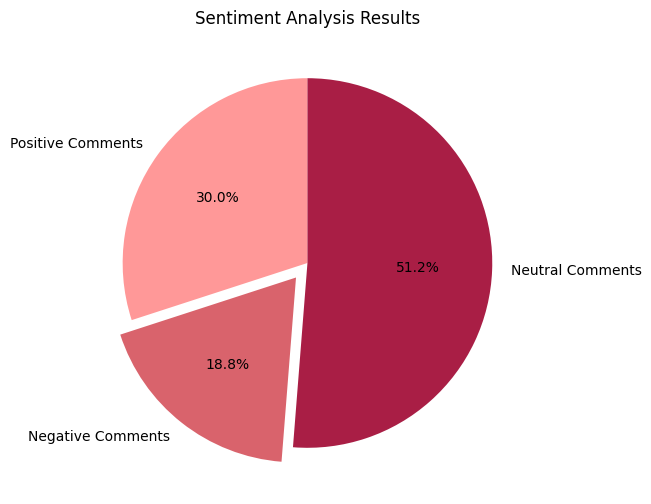

In [38]:
# Create the pie chart
labels = ['Positive Comments', 'Negative Comments', 'Neutral Comments']
sizes = [48, 30, 82]
colors = ['#FF9898FF', '#D9636CFF', '#A91E45FF']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Sentiment Analysis Results')
plt.show()

In [39]:
# Convert positive text data into a list for topic modeling
positive_training_data = positive_text_data.dropna().tolist()

# Initialize the LDA model
num_topics = 5
num_topic_words = 10
model = tp.LDAModel(k=num_topics)

# Add each document (positive comment) to the LDA model
for text in positive_training_data:
    model.add_doc(text.split())  # Split text into words

# Train the model
print("Topic Model Training for Positive Comments...\n\n")
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Display Topic Model Results
print("\nPositive Comments Topic Model Results:\n\n")
positive_topics = []
for topic_number in range(num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    positive_topics.append(topic_words)
    print(f"✨ Topic {topic_number} ✨\n\n{topic_words}\n")

Topic Model Training for Positive Comments...


Iteration: 0	Log-likelihood: -8.164023633659788
Iteration: 10	Log-likelihood: -8.086528499976879
Iteration: 20	Log-likelihood: -8.073964116947575
Iteration: 30	Log-likelihood: -8.081471777220209
Iteration: 40	Log-likelihood: -8.051574317469933
Iteration: 50	Log-likelihood: -8.022210204429284
Iteration: 60	Log-likelihood: -8.01631787445227
Iteration: 70	Log-likelihood: -7.986443459670061
Iteration: 80	Log-likelihood: -8.000877604105803
Iteration: 90	Log-likelihood: -7.972048511915641

Positive Comments Topic Model Results:


✨ Topic 0 ✨

know build point also much apartment demand lol sure nothing

✨ Topic 1 ✨

rent place live use market neighborhood time well move idea

✨ Topic 2 ✨

one say new benefit need lot example large security fair

✨ Topic 3 ✨

tax property high ami pay market rental low value income

✨ Topic 4 ✨

year take agree sell good really try village make developer



In [40]:
# Convert negative text data into a list for topic modeling
negative_training_data = negative_text_data.dropna().tolist()

# Initialize the LDA model
num_topics = 5
num_topic_words = 10
model = tp.LDAModel(k=num_topics)

# Add each document (negative comment) to the LDA model
for text in negative_training_data:
    model.add_doc(text.split())  # Split text into words

# Train the model
print("Topic Model Training for Negative Comments...\n\n")
iterations = 10
for i in range(0, 100, iterations):  # Train in steps of 'iterations'
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Display Topic Model Results
print("\nNegative Comments Topic Model Results:\n\n")
negative_topics = []
for topic_number in range(num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    negative_topics.append(topic_words)
    print(f"✨ Topic {topic_number} ✨\n\n{topic_words}\n")

Topic Model Training for Negative Comments...


Iteration: 0	Log-likelihood: -8.086066523036298
Iteration: 10	Log-likelihood: -8.065785764030993
Iteration: 20	Log-likelihood: -8.06666857044588
Iteration: 30	Log-likelihood: -8.013243182960773
Iteration: 40	Log-likelihood: -8.033425294478342
Iteration: 50	Log-likelihood: -7.959925080198248
Iteration: 60	Log-likelihood: -8.01494746330928
Iteration: 70	Log-likelihood: -7.995645269622932
Iteration: 80	Log-likelihood: -7.959765681135669
Iteration: 90	Log-likelihood: -7.994983622200245

Negative Comments Topic Model Results:


✨ Topic 0 ✨

move market neighborhood many one make change rate point area

✨ Topic 1 ✨

new low tax story add current folk top developer presence

✨ Topic 2 ✨

high manhattan construction transit illegal land year place come let

✨ Topic 3 ✨

pay live rent entitle income life afford expensive double way

✨ Topic 4 ✨

build fuck zone unit old crisis go long time building



**3.2.c Sentiment Analysis for Top scored comments**

The sentiment analysis of the top 10 comments dominated by neutral and negative tones, reflecting a mix of skepticism and factual engagement with affordable housing issues. The Top scored comments wordcloud further emphasize issues of affordability, housing supply shortage and income disparity. Income, being the second largest, suggests that many comments revolve around how income levels impact housing affordability. This connects to broader issues like income disparity, wage stagnation, and AMI thresholds.


In [41]:
# Step 1: Select the top 10 comments by Reddit score
top10score_df = comments_df.nlargest(10, 'score')

# Step 2: Categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Step 3: Apply sentiment categorization
top10score_df['sentiment'] = top10score_df['sentiment_score'].apply(categorize_sentiment)

# Step 4: Count the number of comments in each sentiment category
sentiment_counts = top10score_df['sentiment'].value_counts()

# Step 5: Print the sentiment counts
print(sentiment_counts)

sentiment
Neutral     5
Negative    4
Positive    1
Name: count, dtype: int64


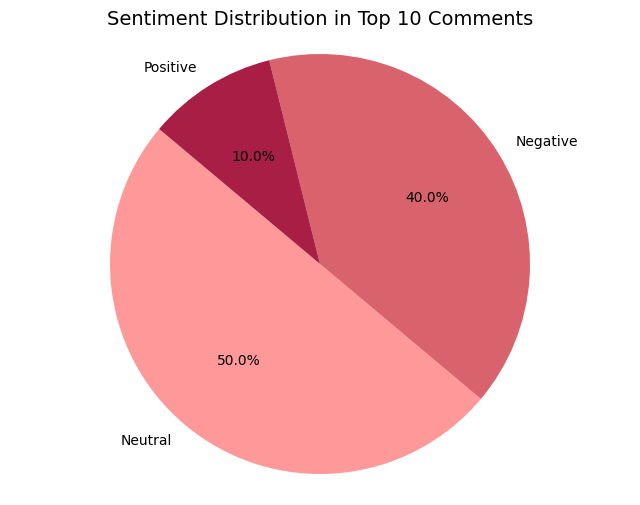

In [42]:
# Prepare data
sentiment_counts = top10score_df['sentiment'].value_counts()

# # Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FF9898FF', '#D9636CFF', '#A91E45FF']
)
plt.title('Sentiment Distribution in Top 10 Comments', fontsize=14)
plt.axis('equal')
plt.show()

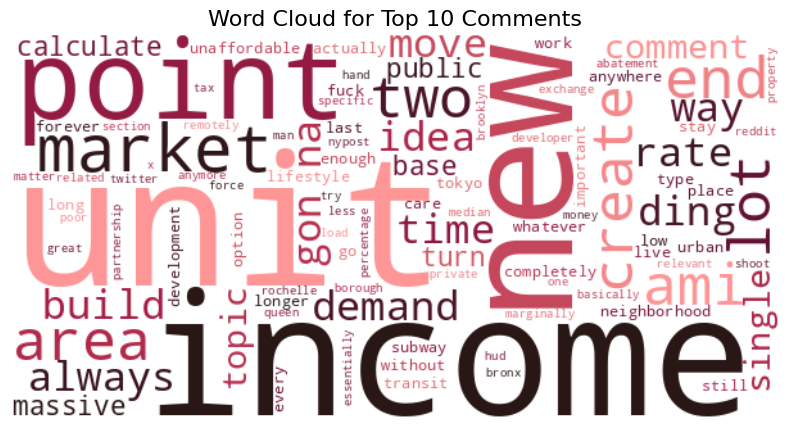

In [43]:
from matplotlib.colors import LinearSegmentedColormap
# Combine all text from the top 10 comments into a single string
top10_text = ' '.join(top10score_df['lemmatized_text'].dropna())

palette = ['#FF9898FF', '#D9636CFF', '#A91E45FF', '#691238FF', '#251714FF']
custom_colormap = LinearSegmentedColormap.from_list("custom_palette", palette)

# Generate the word cloud
wordcloud_top10 = WordCloud(
    width=600,
    height=300,
    background_color='white',
    colormap=custom_colormap,
    max_words=100
).generate(top10_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top10, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Top 10 Comments", fontsize=16)
plt.show()

In [44]:
top10score_df

,parent_id,author,parent_text,score,date,lemmatized_text,sentiment_score,sentiment
0,l40meoy,99hoglagoons,"Man, all these comments and not a single one even remotely relevant to the topic at hand. Are we on reddit or twitter or NYPost comment section. It doesn't matter anymore. Just shoot your load that is marginally related to the topic. \n\nBut basically:\n\n* NYC tried to create a private-public partnership with developers. 421a essentially. Massive property tax abatements in exchange for X percentage of affordable units.\n\n* Turns out most of the affordable units created are not affordable at all. \n\n* Affordability is calculated based on AMI (area median income), but HUD forces NYC to calculate the AMI based on greater NYC area, not just the city, or borough, or specific neighborhood. \n\n* Turns out poor people in Bronx and Queens and Brooklyn make a lot less money than people in New Rochelle, or whatever. \n\n* When an affordable unit is built, it is often listed as eligible for 70-110% AMI, which is completely unaffordable for anyone actually low income. \n\n* End result is that a lot of communities end up being stoutly against any new development, because they can see with their own eyes that none of the new stuff is actually for them. \n\n* The affordable housing program ended up accidentally creating a whole new type and generation of NIMBYS.\n\nI ad-libbed on the last two points. But this is where we are now.",217,2024-05-14 15:46:33,man comment single one remotely relevant topic hand reddit twitter nypost comment section matter anymore shoot load marginally related topic basically try create private public partnership developer essentially massive property tax abatement exchange x percentage unit turn unit create calculate base ami area median income hud force calculate ami base great area borough specific neighborhood turn poor bronx queen brooklyn lot less money new rochelle whatever built often list eligible ami completely unaffordable anyone actually low income end result lot community end stoutly new development see eye none new stuff actually program end accidentally create whole new type generation nimby ad libbed last two point,0.4404,Neutral
7,l40s0jl,soflahokie,"Thanks for explaining this, I've always wondered with the ""low-income"" units cost like $2,500 a month and the income max is something like $110k. That's completely unaffordable",87,2024-05-14 16:18:01,thanks explain always wonder low income unit cost month income max something completely unaffordable,0.2023,Neutral
15,l4032t6,hereswhatipicked,"I've always thought the solution was more and better transit options. If you could get anywhere in the NYC from anywhere in NYC in 30min, that would open up a lot of areas where there is housing stock to people who are living in NYC more for the employment options than the urban-chic lifestyle (and there are plenty of people who fit that bill).\n\nObviously, that is pie-in-the-sky idea and probably as equally impossible as building enough units to outpace demand. But we can dream!",71,2024-05-14 13:53:34,always thought solution well transit option anywhere anywhere open lot area stock living employment option urban chic lifestyle plenty fit bill obviously pie sky idea probably equally impossible enough unit outpace demand dream,0.8176,Positive
1,l3zy7ba,TarumK,"Is there any realistic way housing could be affordable in NYC without a massive drop in demand? Like, if you make housing way below market rate people are just gonna stay in it forever, as happens with rent control and public housing, so it's still gonna be functionally unavailable for most people that would want.",65,2024-05-14 13:22:31,realistic way without massive drop demand way market rate gon na stay forever happens rent control public still gon na functionally unavailable,0.2924,Neutral
2,l4014fm,Puzzleheaded_Will352,Just fucking build already Jesus Christ. How many times are we going to talk about there not being enough housing before we…

## 3.3 Contextual Analysis of Keywords

Last but not least, we focus on NYC-specific policy such as 421a and 485x to have a more zoomed-in analysis on public perception towards affordable housing policy. The context analysis highlights serial important findings.

First being that property tax imbalances are a fundamental barrier, discussed in Comments 2, 3, and 4. Many commenters identify NYC’s high property taxes on large rental buildings as a core issue. Large multifamily rentals face tax rates “5–10x more than smaller units” and “2–3x of condos/co-ops,” making tax abatements essential for any rental construction.

*-	“The 421a/485x property tax abatement is just to somewhat lower the property tax burden so any building can be built.”*

*-	“Developers are so addicted to tax abatements, they are incapable of creating housing for almost anyone.”*


Second being the fact that affordability calculation are unrealistics, which support our initial hypothesis. Tying affordability to the AMI, which includes wealthier suburban areas, leads to thresholds that are unaffordable for many NYC residents. This results in skepticism about the effectiveness of the programs.

*-	Most of the affordable units created are not affordable at all.”*

Next, comments emphasize that NYC’s housing market is influenced by broader challenges dilute the impact of programs like 421a and 485x, including property tax disparities between rental properties and condos/co-ops, zoning restrictions, and market dynamics like Airbnb proliferation.  The comments suggests that fixing either 421a or 485x in isolation would have minimal impact because the broader housing system is broken.

*-	“Fixing just a single one of these will ultimately not fix much.”*

One interesting finding the of political dynamics behind housing policies, detailed in Comments 2 and 4. Politicians are accused of imposing affordability mandates not to solve housing issues but to gain favor with anti-growth voters. These mandates are seen as poorly integrated and counterproductive.

*-	 “Affordability % are tacked on by politicians to appease certain voters.”*

These comments highlight a growing consensus that piecemeal fixes are insufficient without comprehensive reform.

In [45]:
# Filter keywords "421a" or "485x"
filtered_comments_df = comments_df[
    comments_df['parent_text'].str.contains("421a", case=False, na=False) |
    comments_df['parent_text'].str.contains("485x", case=False, na=False)
]

In [46]:
# Extract keyword contexts
def extract_contexts(text, keywords, window=30):
    words = nltk.word_tokenize(text.lower())
    return [" ".join(words[max(i - window, 0):min(i + window + 1, len(words))])
            for i, word in enumerate(words) if word in keywords]

keywords = ["421a", "485x"]
contexts = [context for sublist in filtered_comments_df['parent_text'].apply(lambda x: extract_contexts(x, keywords)) for context in sublist]

# Display contexts
for context in contexts[:20]:
    for keyword in keywords:
        if keyword in context:
            left, right = context.split(keyword, 1)
            print(f"{left[-100:]:>100} {keyword} {right[:100]:<100}")
            break

to the topic . but basically : * nyc tried to create a private-public partnership with developers .  421a  essentially . massive property tax abatements in exchange for x percentage of affordable units . * 
 % ami too low , nothing will be built & everyone is worse off , so they allowed 100 % + amis now ,  485x  is more demanding on affordability so there ’ s an even smaller incentive to build big rentals , on
r airbnb , or whatever ) . fixing just a single one of these will ultimately not fix much . > now ,  485x  is more demanding on affordability so there ’ s an even smaller incentive to build big rentals , on
ice numbers . add ballooning costs of labor and materials , and market is fucked . no need to blame  421a  or 485x on top of that . > and 2-3x of condos/co-ops , rentals are not being taxed at 2-3x as co-op
ice numbers . add ballooning costs of labor and materials , and market is fucked . no need to blame  421a  or 485x on top of that . > and 2-3x of condos/co-ops , rentals ar

In [47]:
# Perform Sentiment Analysis on the filtered comments
filtered_comments_df['sentiment'] = filtered_comments_df['parent_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

<ipython-input-47-075b78a9884f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments_df['sentiment'] = filtered_comments_df['parent_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [48]:
filtered_comments_df['sentiment_category'] = filtered_comments_df['sentiment'].apply(categorize_sentiment)

# Sort the comments by sentiment score
sorted_sentiments_df = filtered_comments_df.sort_values(by='score', ascending=False)

sorted_sentiments_df[["parent_id",'parent_text',"score", 'sentiment', 'sentiment_category',"date"]]

<ipython-input-48-f38e04d6cc9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments_df['sentiment_category'] = filtered_comments_df['sentiment'].apply(categorize_sentiment)


,parent_id,parent_text,score,sentiment,sentiment_category,date
0,l40meoy,"Man, all these comments and not a single one even remotely relevant to the topic at hand. Are we on reddit or twitter or NYPost comment section. It doesn't matter anymore. Just shoot your load that is marginally related to the topic. \n\nBut basically:\n\n* NYC tried to create a private-public partnership with developers. 421a essentially. Massive property tax abatements in exchange for X percentage of affordable units.\n\n* Turns out most of the affordable units created are not affordable at all. \n\n* Affordability is calculated based on AMI (area median income), but HUD forces NYC to calculate the AMI based on greater NYC area, not just the city, or borough, or specific neighborhood. \n\n* Turns out poor people in Bronx and Queens and Brooklyn make a lot less money than people in New Rochelle, or whatever. \n\n* When an affordable unit is built, it is often listed as eligible for 70-110% AMI, which is completely unaffordable for anyone actually low income. \n\n* End result is that a lot of communities end up being stoutly against any new development, because they can see with their own eyes that none of the new stuff is actually for them. \n\n* The affordable housing program ended up accidentally creating a whole new type and generation of NIMBYS.\n\nI ad-libbed on the last two points. But this is where we are now.",217,0.1687,Neutral,2024-05-14 15:46:33
9,l43dkgi,"I do not agree.\n\nThe actual story is NYC taxes bigger multifamily rental buildings 5-10x more than smaller units (e.g. Brooklyn brownstones) and 2-3X of condos/co-ops, so 421a/485x tax abatements are needed t for any large rental projects to be economically viable and worthwhile to do.\n\nPoliticians want to appear like they are extracting economics from developers because they want to score political points with the anti-change / anti-growth caucus (aka NIMBYs) so they demand X% AMI\n\nBut historically pols also knew if they made the % AMI too low, nothing will be built & everyone is worse off, so they allowed 100%+ AMIs\n\nNow, 485x is more demanding on affordability so there’s an even smaller incentive to build big rentals, on top of the high property taxes.\n\nSo the incentive is to build more brownstones or co-ops to sell to rich people!",8,0.7276,Positive,2024-05-15 01:34:17
38,l43i3e4,"Property tax imbalance is another element that you can add to the bucket of housing issues. But don't be one of those who target fixates on single issue only (it's the zoning! or nimbys, or crazy rich asians, or airbnb, or whatever). Fixing just a single one of these will ultimately not fix much. \n\n> Now, 485x is more demanding on affordability so there’s an even smaller incentive to build big rentals, on top of the high property taxes.\n\nDevelopers could just build 100% market rate and not worry about participating in any of this? The ugly truth is developers are so addicted to tax abatements, they are incapable of creating housing for almost anyone. And that's the ugliest truth. Cost of land alone makes it prohibitive to hit any decent price numbers. Add ballooning costs of labor and materials, and market is fucked. No need to blame 421a or 485x on top of that. \n\n> and 2-3X of condos/co-ops,\n\nRentals are not being taxed at 2-3X as co-ops. If an average 1bed coop in Manhattan is paying $800-1000 in taxes a month, equal rental is not paying up to $3k in taxes. Like cmon. But we can agree that every wealthy person who moved into new construction luxury is most likely not paying anything in property taxes at all. And they get to do that because their building was supposed to create ""affordable housing"", but most likely did not do that at all.",4,0.1560,Neutral,2024-05-15 02:04:10
70,l43k5a5,"They cannot build 100% market rate & for things to be economically viable without a tax abatement because the property taxes are so high for big rental buildings. The affordability requirements only make t

#Conclusion
---

This project examined public perceptions of why affordable housing is not truly affordable, focusing on systemic challenges like vague definitions, high costs, financing gaps, and supply shortages. Sentiment analysis and topic modeling reveal strong support for the hypothesis, especially the vague definition of "affordability" and negative impact of AMI (can up to 130% of AMI) that lowest-income residents from qualifying for housing assistance.

Meanwhile, the results also highlighted seriel key matrics that hasn't been identified within the hypothesis but the public care the most. This includes:
1. the critical role of property tax imbalances, which make large rental developments economically unviable without tax abatements, shifting developer focus to luxury or smaller-scale housing;
2. the void political gestures with politicians imposing affordability mandates to gain favor with anti-growth voters.

Several limitations and challenges in the analysis should be acknowledged. First, the informal nature of Reddit comments posed significant challenges in data preprocessing. Processes like data cleansing and lemmatization may inadvertently strip away important context, reducing the effectiveness of topic modeling and sentiment analysis compared to analyses conducted on more formal texts, such as newspapers or academic journals. Furthermore, a notable 51.2% of the discourse comprised neutral comments, potentially obscuring clear sentiment trends. Positive sentiments often included words like "increase" or "change," which lack inherent emotional tone and can shift in sentiment depending on context—for example, "increasing rents" is negative for renters but could be neutral or positive for landlords.

Another key limitation is the narrow scope of the dataset. Due to time constraints, the project focused on a single Reddit post, limiting dataset diversity and potentially failing to capture the broader emotional and thematic landscape surrounding the topic. To address these issues, future efforts should refine the sentiment analysis model, incorporating more advanced linguistic techniques to handle mixed sentiments, such as sarcasm or nuanced criticism. Additionally, expanding the dataset to include multiple discussions across various platforms and applying advanced natural language processing (NLP) methods could provide a more comprehensive and accurate representation of public attitudes on the topic.

In summary, public perceptions reflect widespread criticism of affordable housing policies, driven by systemic failures and political missteps. Poliocy reforms must address public concerns in AMI thresholds,  tax disparities, and incentivize truly affordable developments. Comprehensive solutions, not piecemeal fixes, are essential to meet the community’s needs.

#Bibliography


---


Bibliography:
Zaveri, M. (2024, November 27). A Housing Crisis Deepens, and a Reporter Digs In. The New York Times. Retrieved from https://www.nytimes.com/2024/11/27/nyregion/housing-reporter.html
Zaveri, M. (2024, November 14). The Housing Crunch: Zoning in New York. The New York Times. Retrieved from https://www.nytimes.com/2024/11/14/nyregion/housing-crunch-zoning-new-york.html

Reddit user. (2023, August 8). NYC has more housing than ever before, yet it’s still unaffordable. Reddit. Retrieved from https://www.reddit.com/r/nyc/comments/15lw93e/nyc_has_more_housing_than_ever_before_yet_its/

Brooks, M. M. (2023). Measuring America’s affordability problem: Comparing alternative measurements of affordable housing. Housing Policy Debate, 33(6), 1293-1312. https://doi.org/10.1080/10511482.2021.2010119&#8203;.

Büchler, S., & Lutz, E. (2024). Making housing affordable? The local effects of relaxing land-use regulation. Journal of Urban Economics, 143, Article 103689. https://doi.org/10.1016/j.jue.2024.103689&#8203;.

Diamond, R., & McQuade, T. (2016). Who wants affordable housing in their backyard? An equilibrium analysis of low-income property development. NBER Working Paper Series. Working Paper 22204. National Bureau of Economic Research. https://doi.org/10.3386/w22204&#8203;.

Vigneswaran, D., Truebestein, M., & Aepli, M. D. (2022). Affordable housing as a profitable impact investment: An international comparison of real estate strategies. Contributions to Finance and Accounting. Springer Nature. https://doi.org/10.1007/978-3-031-07091-4&#8203.